# PUMP IT

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

An interactive course exploring this dataset is currently offered by DataCamp.com!

Competition End Date: Jan. 28, 2017, 11:59 p.m.

This competition is for learning and exploring, so the deadline may be extended in the future.


* [Git Hub Repo](https://github.com/msampathkumar/datadriven_pumpit)
* [Git Hub Report](https://github.com/msampathkumar/datadriven_pumpit/blob/master/capstone_proposal.mdown)
* [Features Details](https://www.drivendata.org/competitions/7/page/25/)



## Global Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(69572)

%matplotlib inline

%load_ext writeandexecute

# plt.figure(figsize=(120,10))

# plot figsize
small = (4,3)
mid = (10, 8)
large = (12, 8)

'writeandexecute' magic loaded.


## Custom Functions

### MarkUP Fns

In [2]:
from __future__ import absolute_import
from IPython.core.getipython import get_ipython
from IPython.core.magic import (Magics, magics_class,  cell_magic)
import sys
from StringIO import StringIO
from markdown import markdown
from IPython.core.display import HTML
 
@magics_class
class MarkdownMagics(Magics):
 
    @cell_magic
    def asmarkdown(self, line, cell):
        buffer = StringIO()
        stdout = sys.stdout
        sys.stdout = buffer
        try:
            exec(cell, locals(), self.shell.user_ns)
        except:
            sys.stdout = stdout
            raise
        sys.stdout = stdout
        return HTML("<p>{}</p>".format(markdown(buffer.getvalue(), extensions=['markdown.extensions.extra'])))
        return buffer.getvalue() + 'test'
 
get_ipython().register_magics(MarkdownMagics)

### DataFrame Value Counts

In [3]:
import pandas as pd

def raw_markup_value_counts(dataframe, max_print_value_counts=30, show_plots=False):
    '''
    prints value counts of each feature in data frame
    '''
    mydf = pd.DataFrame.copy(dataframe)
    i = 0
    raw_markup_data = []
    pp = raw_markup_data.append
    pp('''|Col ID|Col Name|UniqCount|Col Values|UniqValCount|''')
    pp('''|------|--------|---------|----------|------------|''')
    for col in mydf.dtypes.index:
        i += 1
        sam = mydf[col]
        tmp = len(sam.value_counts())
        if tmp < max_print_value_counts:
            flag = True
            for key, val in dict(sam.value_counts()).iteritems():
                if flag:
                    pp('|%i|%s|%i|%s|%s|' % (
                            i, col, len(sam.value_counts()), key, val))
                    flag = False
                else:
                    pp('||-|-|%s|%s|' % (key, val))
            if show_plots:
                plt.figure(i)
                ax = sam.value_counts().plot(kind='barh', figsize=(12, 5))
                _ = plt.title(col.upper())
                _ = plt.xlabel('counts')
        else:
            pp('|%i|%s|%i|||' % (i, col, len(sam.value_counts())))
    return raw_markup_data

#### Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix

import itertools

from __future__ import division

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

    
# def confusion_maxtrix_stuff(y_test, y_pred, class_names=RAW_y.status_group.value_counts().keys()):
def confusion_maxtrix_stuff(y_test, y_pred, class_names):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

## Import & Explore Data

In [5]:
RAW_X = pd.read_csv('traning_set_values.csv', index_col='id')
RAW_y = pd.read_csv('training_set_labels.csv', index_col='id')
test_submission = pd.read_csv('test_set_values.csv', index_col='id')

In [6]:
RAW_X.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
RAW_X.dtypes[RAW_X.dtypes == object]

date_recorded            object
funder                   object
installer                object
wpt_name                 object
basin                    object
subvillage               object
region                   object
lga                      object
ward                     object
public_meeting           object
recorded_by              object
scheme_management        object
scheme_name              object
permit                   object
extraction_type          object
extraction_type_group    object
extraction_type_class    object
management               object
management_group         object
payment                  object
payment_type             object
water_quality            object
quality_group            object
quantity                 object
quantity_group           object
source                   object
source_type              object
source_class             object
waterpoint_type          object
waterpoint_type_group    object
dtype: object

## Pre Processing



1. Start_date

    Converting start_date from object type to integer, `2012-10-01` ==> 20121001

2. Longitude & Latitude

    Thirteen decimal places will pin down the location to 111,111/10^13 = about 1 angstrom, around half the thickness of a small atom.
    The sign tells us whether we are north or south, east or west on the globe.
    * A nonzero hundreds digit tells us we're using longitude, not latitude!
    * The tens digit gives a position to about 1,000 kilometers. It gives us useful information about what continent or ocean we are on.
    * The units digit (one decimal degree) gives a position up to 111 kilometers (60 nautical miles, about 69 miles). It can tell us roughly what large state or country we are in.
    * The first decimal place is worth up to 11.1 km: it can distinguish the position of one large city from a neighboring large city.
    * The second decimal place is worth up to 1.1 km: it can separate one village from the next.
    * The third decimal place is worth up to 110 m: it can identify a large agricultural field or institutional campus.
    * The fourth decimal place is worth up to 11 m: it can identify a parcel of land. It is comparable to the typical accuracy of an uncorrected GPS unit with no interference.

    As we dont need a higher accuracy than 4 digits, we are going trim to 4 digits.


Source: [Link](http://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude)

#### DateTime to Int

In [8]:
from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2000-01-01', date_format)
b = datetime.strptime('2013-01-28', date_format)
delta = b - a
print delta.days # that's it

4776


In [9]:
RAW_X.date_recorded.head()

id
69572    2011-03-14
8776     2013-03-06
34310    2013-02-25
67743    2013-01-28
19728    2011-07-13
Name: date_recorded, dtype: object

In [10]:
date_format = "%Y-%m-%d"
a_start_date = datetime.strptime('2000-01-01', date_format)

RAW_X.date_recorded = RAW_X.date_recorded.map(lambda x: (datetime.strptime(str(x), date_format) - a_start_date).days)

#### Logititude and Latitude

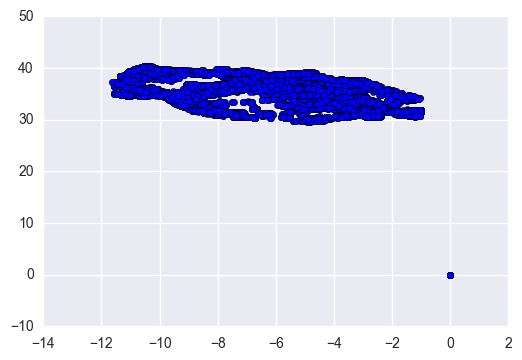

In [11]:
_ = plt.scatter(RAW_X[u'latitude'], RAW_X[u'longitude'])

# plt.figure(figsize=small)
# _ = plt.scatter(RAW_X[u'latitude'][RAW_X.latitude >= -1.0], RAW_X[u'longitude'][RAW_X.latitude >= -1.0])

Outliers Count: 1819
Outliers Count: 1812


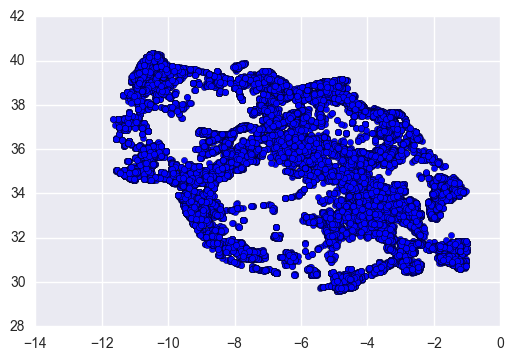

In [12]:
# Fixing the Outliers
print 'Outliers Count:', len(RAW_X[u'latitude'][RAW_X[u'latitude'] >= -1.0])
print 'Outliers Count:', len(RAW_X[u'longitude'][RAW_X[u'longitude'] <= 1.0])


_ = np.mean(RAW_X[u'latitude'][RAW_X.latitude < -1.0].values)
RAW_X.loc[RAW_X.latitude >= -1.0, u'latitude'] = _


_ = np.mean(RAW_X[u'longitude'][RAW_X[u'longitude'] > 1.0].values)
RAW_X.loc[RAW_X[u'longitude'] <= 1.0, u'longitude'] = _

_ = plt.scatter(RAW_X[u'latitude'], RAW_X[u'longitude'])

In [13]:
# reducing geo location precision to 11 meters

long_lat_precision = 1/10 ** 3

RAW_X.longitude = RAW_X.longitude// 0.0001
RAW_X.latitude = RAW_X.latitude// 0.0001

#### Fixing Boolean Values

In [14]:
RAW_X.public_meeting = RAW_X.public_meeting == True
RAW_X.permit = RAW_X.permit == True

#### Text issues

In [15]:
def text_transformation(name):
    if name:
        name = name.lower().strip()
        name = ''.join([i if 96 < ord(i) < 128 else ' ' for i in name])
        if 'and' in name:
            name = name.replace('and', ' ')
        while '  ' in name:
            name = name.replace('  ', ' ')
        return name.strip()
    return 

for col in RAW_X.dtypes[RAW_X.dtypes == object].index:
    aa = len(RAW_X[col].unique())
    RAW_X[col] = RAW_X[col].fillna('').apply( lambda x : text_transformation(x))
    bb = len(RAW_X[col].unique())
    if aa != bb:
        print col, aa, bb

funder 1898 1881
installer 2146 1867
wpt_name 37400 36717
subvillage 19288 19176
scheme_name 2697 2485


#### Cols vs Uniq distribution

#### Boolean Column

In [16]:
RAW_X.public_meeting = RAW_X.public_meeting == True
RAW_X.permit = RAW_X.permit == True

### Understanding distribution of data

## Vector Transformation


* Feature Selection:
    http://machinelearningmastery.com/feature-selection-machine-learning-python/

In [17]:
from collections import defaultdict
from sklearn import preprocessing

# http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
d = defaultdict(preprocessing.LabelEncoder)

# Labels Fit
sam = pd.concat([RAW_X, test_submission]).apply(lambda x: d[x.name].fit(x))

# Labels Transform - Training Data
X = RAW_X.apply(lambda x: d[x.name].transform(x))

# Labels Transform - Submission Data
# test_submission = test_submission.apply(lambda x: d[x.name].transform(x))

#
le = preprocessing.LabelEncoder().fit(RAW_y)
y = le.transform(RAW_y[u'status_group'])


/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]
/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# g = sns.PairGrid(X[:1000])
# g.map(plt.scatter);

### UniVariate Analysis

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
test = SelectKBest(score_func=chi2, k=30)
fit = test.fit(X, y)

np.set_printoptions(precision=2)
print(fit.scores_), len(fit.scores_)

col_importances = list(zip(fit.scores_, RAW_X.columns))
col_importances.sort(reverse=True)
selected_cols =  [_[-1] for _ in col_importances[:30] ]

[  7.49e+04   9.62e+03   2.44e+04   5.13e+05   1.10e+04   1.20e+06
   2.29e+05   6.31e+04   2.11e+02   8.30e+01   1.25e+04   5.76e+02
   1.70e+03   6.45e+02   2.97e+03   1.08e+03   5.16e+03   4.42e+01
   0.00e+00   4.06e+02   2.44e+05   1.31e+04   2.43e+04   3.45e+03
   4.67e+03   7.67e+03   1.64e+02   3.02e+01   8.66e+02   4.63e+02
   4.62e+00   4.23e+02   6.73e+02   6.73e+02   4.16e+02   5.39e+02
   3.95e+02   5.67e+03   4.47e+03] 39


In [21]:
features = pd.DataFrame(fit.transform(X))
features.columns = selected_cols

In [22]:
print len(X.columns), features.shape, len(y)

39 (59400, 30) 59400


## Test-Train Split

In [23]:
from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=42, stratify=y)

/Users/sampathkumarm/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Model Training

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [25]:
clf = clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

In [26]:
cols_imp = list(zip(clf.feature_importances_, X_train.columns))
cols_imp.sort(key=lambda x: x[0])

# cols_imp

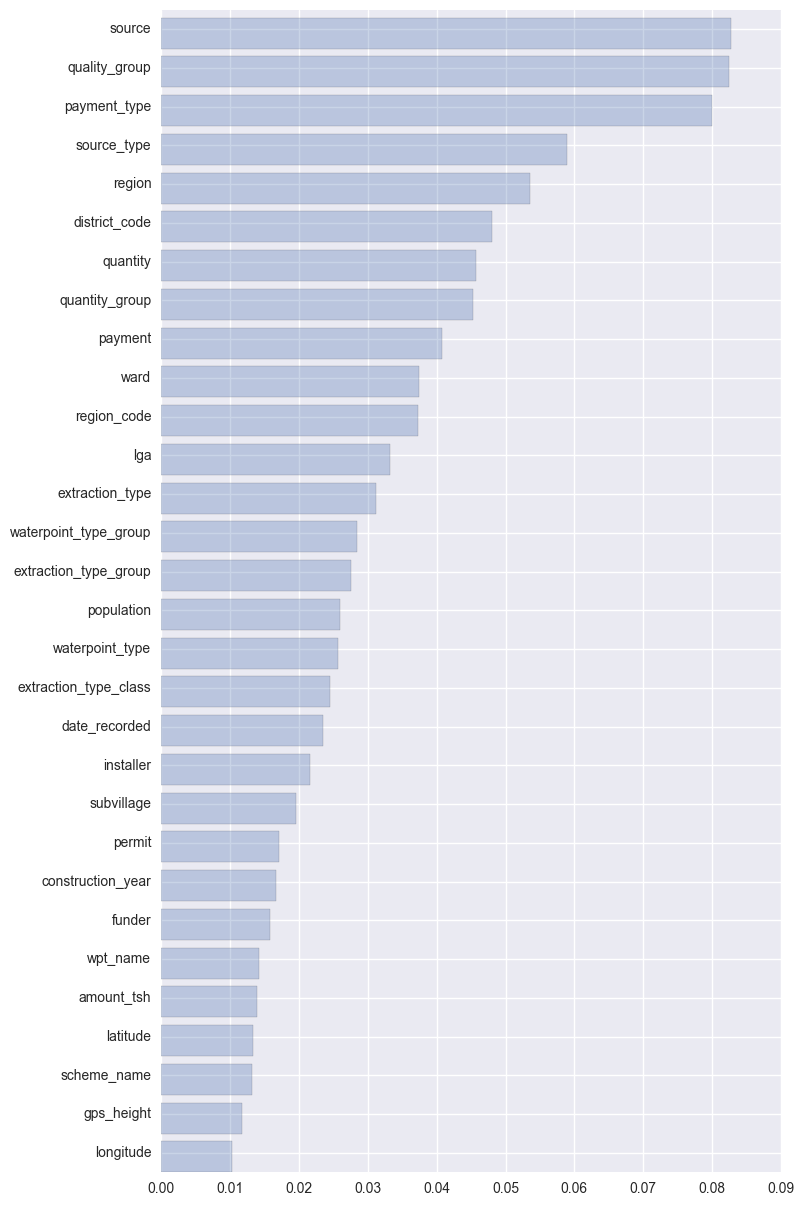

In [27]:
def plot_feature_importance(columns, importances):
    '''
    Args:
        columns(list): list of strings
        importances(list): list of values
    Result:
        plot_feature_importance(X_train.columns, clf.feature_importances_)
    '''
    cols_imp = list(zip(clf.feature_importances_, X_train.columns))
    cols_imp.sort(key=lambda x: x[0])
    cols_imp

    plt.figure(figsize=(8, 15))
    values = [x[-2] for x in cols_imp]
    lables = [x[-1] for x in cols_imp]

    _ = plt.barh(range(len(values)), values, alpha=0.3)
    _ = plt.yticks([_ + 0.5 for _ in range(len(values))], X_train.columns)


#
plot_feature_importance(X_train.columns, clf.feature_importances_)

## Scoring

### Random Forest Score

In [28]:
from sklearn import metrics

In [29]:
print map(lambda x: len(x), [X_test, y_test])

clf.score(X_test, y_test) # 0.79303132333435367 # 0.80252525252525253 # 0.80303030303030298 # 0.80345117845117842

[11880, 11880]


0.80303030303030298

In [30]:
print .79303132333435367 - 0.80345117845117842

print .8285 - 0.80345117845117842, .8285 - .79303132333435367



-0.0104198551168
0.0250488215488 0.0354686766656


### XGBOOST

In [31]:
import xgboost as xgb

## Submission